## Installation

In [ ]:
!pip install git+https://github.com/geraldioeres/detectree2.git
!git clone https://github.com/facebookresearch/detectron2.git detectron2
!pip install --upgrade --force-reinstall rasterio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Flow Code

## Tiling

In [ ]:
from detectree2.preprocessing.tiling import tile_data, to_traintest_folders
from detectree2.models.train import register_train_data, MyTrainer, setup_cfg
import rasterio
import geopandas as gpd

In [ ]:
dataset_dict = {
    # Name : [Folder, Img, Crown]
    "DN" : ["Danum", "Danum", "Danum"],
    "SE" : ["Sepilok", "Sepilok","SepilokEast"],
    "SW" : ["Sepilok", "Sepilok", "SepilokWest"],
    "JE": ["Juaq_East", "JQA_East", "JQA_East"],
    "JW": ["Juaq_West", "JQA_West", "JQA_West"],
    "LN": ["LPB_North", "LPB_North", "LPB_North"]
}

In [ ]:
def data_tiling(dataset_name, dataset_list, buffer=20, tile_width=30, tile_height=30, threshold=0.4):
    """
    Tile data according to the input values

    Args:
        dataset_list (list): list of datasets information
        buffer (int): buffer or overlapping area between tiles
        tile_width (int): width of the tile
        tile_height (int): height of the tile
        threshold (float): threshold for the crown
    """

    appends = str(tile_width) + "_" + str(buffer) + "_" + str(threshold)
    site_path = "/content/drive/MyDrive/Research/data/" + dataset_list[0]

    img_path = site_path + "/rgb/" + dataset_list[1] + ".tif"
    crown_path = site_path + "/crowns/" + dataset_list[2] + ".gpkg"
    out_dir = site_path + '/tiles' + dataset_name + "_" + appends + "/"

    # Read in the tiff file
    data = rasterio.open(img_path)

    # Read in crowns (then filter by an attribute?)
    crowns = gpd.read_file(crown_path)
    crowns = crowns.to_crs(data.crs.data)

    print(data.meta)
    print(crowns.shape)
    print(out_dir)

    tile_data(img_path, out_dir, buffer, tile_width, tile_height, crowns, threshold, mode="rgb")
    data_folder = out_dir
    to_traintest_folders(data_folder, out_dir, test_frac=0.15, strict=False, folds=5)

    return out_dir

In [ ]:
# out_dir_list = {}
# for ds in dataset_dict:
#   out_dir_list[ds] = data_tiling(ds, dataset_dict[ds])

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 84370, 'height': 40665, 'count': 4, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 50N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32650"]]'), 'transform': Affine(0.1, 0.0, 600543.5,
       0.0, -0.1, 648673.5)}
(849, 6)
/content/drive/MyDrive/Research/data/Sepilok/tilesSE_30_20_0.4/


  0%|          | 0/37386 [00:00<?, ?it/s]

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 84370, 'height': 40665, 'count': 4, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 50N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32650"]]'), 'transform': Affine(0.1, 0.0, 600543.5,
       0.0, -0.1, 648673.5)}
(2265, 6)
/content/drive/MyDrive/Research/data/Sepilok/tilesSW_30_20_0.4/


  0%|          | 0/37386 [00:00<?, ?it/s]

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 34992, 'height': 34027, 'count': 4, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 50N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32650"]]'), 'transform': Affine(0.013888678056477711, 0.0, 353017.7796537448,
       0.0, -0.013888678056477711, -17666.30547973588)}
(711, 3)
/content/drive/MyDrive/Research/data/Juaq_East/tilesJE_30_20_0.4/


  0%|          | 0/196 [00:00<?, ?it/s]

ERROR:detectree2.preprocessing.tiling:Error processing tile JQA_East at (353188, -17938): TopologyException: side location conflict at 353211.34240797273 -17912.912445872214. This can occur if the input geometry is invalid.
ERROR:detectree2.preprocessing.tiling:Error processing tile JQA_East at (353188, -17908): TopologyException: side location conflict at 353211.34240797273 -17912.912445872214. This can occur if the input geometry is invalid.
ERROR:detectree2.preprocessing.tiling:Error processing tile JQA_East at (353218, -17938): TopologyException: side location conflict at 353211.34240797273 -17912.912445872214. This can occur if the input geometry is invalid.
ERROR:detectree2.preprocessing.tiling:Error processing tile JQA_East at (353218, -17908): TopologyException: side location conflict at 353211.34240797273 -17912.912445872214. This can occur if the input geometry is invalid.


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 27238, 'height': 29617, 'count': 4, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 50N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32650"]]'), 'transform': Affine(0.014316894775811214, 0.0, 352675.83733096847,
       0.0, -0.014316894775811214, -17521.6101667044)}
(1044, 4)
/content/drive/MyDrive/Research/data/Juaq_West/tilesJW_30_20_0.4/


  0%|          | 0/132 [00:00<?, ?it/s]

ERROR:detectree2.preprocessing.tiling:Error processing tile JQA_West at (352696, -17715): TopologyException: side location conflict at 352705.88976730197 -17671.028721929568. This can occur if the input geometry is invalid.
ERROR:detectree2.preprocessing.tiling:Error processing tile JQA_West at (352696, -17685): TopologyException: side location conflict at 352705.88976730197 -17671.028721929568. This can occur if the input geometry is invalid.
ERROR:detectree2.preprocessing.tiling:Error processing tile JQA_West at (352696, -17655): TopologyException: side location conflict at 352705.88976730197 -17671.028721929568. This can occur if the input geometry is invalid.
ERROR:detectree2.preprocessing.tiling:Error processing tile JQA_West at (352726, -17715): TopologyException: side location conflict at 352705.88976730197 -17671.028721929568. This can occur if the input geometry is invalid.
ERROR:detectree2.preprocessing.tiling:Error processing tile JQA_West at (352726, -17685): TopologyExcept

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 22059, 'height': 44729, 'count': 4, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 50N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32650"]]'), 'transform': Affine(0.04522973779250793, 0.0, 221246.08743603725,
       0.0, -0.04522973779250793, 84122.96142266122)}
(610, 3)
/content/drive/MyDrive/Research/data/LPB_North/tilesLN_30_20_0.4/


  0%|          | 0/2046 [00:00<?, ?it/s]

ERROR:detectree2.preprocessing.tiling:Error processing tile LPB_North at (221567, 83440): TopologyException: side location conflict at 221595.01873752047 83484.319608770486. This can occur if the input geometry is invalid.
ERROR:detectree2.preprocessing.tiling:Error processing tile LPB_North at (221567, 83470): TopologyException: side location conflict at 221595.01873752047 83484.319608770486. This can occur if the input geometry is invalid.
ERROR:detectree2.preprocessing.tiling:Error processing tile LPB_North at (221567, 83500): TopologyException: side location conflict at 221595.01873752047 83484.319608770486. This can occur if the input geometry is invalid.
ERROR:detectree2.preprocessing.tiling:Error processing tile LPB_North at (221597, 83440): TopologyException: side location conflict at 221595.01873752047 83484.319608770486. This can occur if the input geometry is invalid.
ERROR:detectree2.preprocessing.tiling:Error processing tile LPB_North at (221597, 83470): TopologyException:

In [ ]:
data_tiling("DN", ["Danum", "Danum", "Danum"])

## Register

In [ ]:
from detectree2.models.train import register_train_data
import rasterio

In [ ]:
# for ds in temp_dict:
#   out_dir = "/content/drive/MyDrive/Research/data/" + temp_dict[ds][0] + "/tiles" + "_30_20_0.6"
#   print(out_dir)
#   train_location = out_dir + "/train/"
#   register_train_data(train_location, ds, val_fold=4)

In [ ]:
dataset_dict = {
    # Name : [Folder, Img, Crown]
    "DN"  : ["Danum", "Danum", "Danum"],
    "SE" : ["Sepilok", "Sepilok","SepilokEast"],
    "SW" : ["Sepilok", "Sepilok", "SepilokWest"],
    "JE": ["Juaq_East", "JQA_East", "JQA_East"],
    "JW": ["Juaq_West", "JQA_West", "JQA_West"],
    "LN": ["LPB_North", "LPB_North", "LPB_North"]
}

In [ ]:
for ds in dataset_dict:
  out_dir = "/content/drive/MyDrive/Research/data/" + dataset_dict[ds][0] + "/tiles" + ds + "_30_20_0.4"
  print(out_dir)
  train_location = out_dir + "/train/"
  register_train_data(train_location, ds, val_fold=4)

/content/drive/MyDrive/Research/data/Danum/tilesDN_30_20_0.4
/content/drive/MyDrive/Research/data/Sepilok/tilesSE_30_20_0.4
/content/drive/MyDrive/Research/data/Sepilok/tilesSW_30_20_0.4
/content/drive/MyDrive/Research/data/Juaq_East/tilesJE_30_20_0.4
/content/drive/MyDrive/Research/data/Juaq_West/tilesJW_30_20_0.4
/content/drive/MyDrive/Research/data/LPB_North/tilesLN_30_20_0.4


In [ ]:
train_tupple = [ds + "_train" for ds in dataset_dict]
val_tuple = [ds + "_val" for ds in dataset_dict]

In [ ]:
print(tuple(train_tupple))
print(tuple(val_tuple))

('DN_train', 'SE_train', 'SW_train', 'JE_train', 'JW_train', 'LN_train')
('DN_val', 'SE_val', 'SW_val', 'JE_val', 'JW_val', 'LN_val')


## Training Multi

In [ ]:
from detectree2.models.train import register_train_data, MyTrainer, setup_cfg

## ResNet (Baseline)

In [ ]:
from detectron2.config import get_cfg

# Set the base (pre-trained) model from the detectron2 model_zoo
base_config = "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"

out_dir = "/content/drive/MyDrive/Research/model_resnet"


cfg = setup_cfg("model_zoo", base_config, train_tupple, val_tuple, workers = 4, eval_period=100, max_iter=3000, out_dir=out_dir, batch_size_per_im=512, resize="rand_fixed", ims_per_batch=1)

In [ ]:
trainer = MyTrainer(cfg, patience = 5)
trainer.resume_or_load(resume=False)
trainer.train()

[07/05 23:32:45 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_a3ec72.pkl: 254MB [00:00, 286MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


Path to model weights to be loaded:  /root/.torch/iopath_cache/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x/138205316/model_final_a3ec72.pkl


/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Streaming output truncated to the last 5000 lines.
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.102
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.005
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.060
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.228
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.029
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.237
[07/06 08:10:57 d2.evaluation.coco_evaluation]: Evaluation results for bbox: 
|  AP   |  AP50  |  AP75  |  APs  |  APm  |  APl   |
|:-----:|:------:|:------:|:-----:|:-----:|:------:|
| 9.789 | 33.528 | 2.241  | 0.000 | 2.970 | 10.152 |
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
[07/06 08:10:57 d2.evaluation.fast_eval_api]: Evaluate annotation type 

## ResNeXt

In [ ]:
print(tuple(train_tupple))
print(tuple(val_tuple))

In [ ]:
|from detectron2.config import get_cfg

# Set the base (pre-trained) model from the detectron2 model_zoo
resnext_config = "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"

out_dir = "/content/drive/MyDrive/Research/model_resnext"


cfg = setup_cfg("model_zoo", resnext_config, train_tupple, val_tuple, workers = 4, eval_period=100, max_iter=3000, out_dir=out_dir, batch_size_per_im=512, resize="rand_fixed", ims_per_batch=1)

In [ ]:
trainer = MyTrainer(cfg, patience = 5)
trainer.resume_or_load(resume=False)
trainer.train()

[07/06 09:25:34 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_2d9806.pkl: 431MB [00:01, 287MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


Streaming output truncated to the last 5000 lines.
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.010
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.122
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.013
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.238
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.015
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.197
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.318
[07/06 15:43:07 d2.evaluation.coco_evaluation]: Evaluation results for bbox: 
|  AP   |  AP50  |  AP75  |  APs  |  APm  |  APl   |
|:-----:|:------:|

## ResNet + PointRend

In [ ]:
from detectron2.projects import point_rend
from detectron2.config import get_cfg

# Set the base (pre-trained) model from the detectron2 model_zoo
resnet_pr_config = "/content/detectron2/projects/PointRend/configs/InstanceSegmentation/pointrend_rcnn_R_101_FPN_3x_coco.yaml"
backbone_weight = "https://dl.fbaipublicfiles.com/detectron2/PointRend/InstanceSegmentation/pointrend_rcnn_R_101_FPN_3x_coco/28119983/model_final_3f4d2a.pkl"


out_dir = "/content/drive/MyDrive/Research/model_resnet_pointrend"


cfg = setup_cfg("point_rend", resnet_pr_config, train_tupple, val_tuple, workers = 4, eval_period=100, max_iter=3000, out_dir=out_dir, batch_size_per_im=512, resize="rand_fixed", ims_per_batch=1, model_weight=backbone_weight)

In [ ]:
trainer = MyTrainer(cfg, patience = 5)
trainer.resume_or_load(resume=False)
trainer.train()

[07/07 01:22:47 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_3f4d2a.pkl: 317MB [00:04, 68.5MB/s]                           


WARNING [07/07 01:33:25 d2.projects.point_rend.mask_head]: Weight format of PointRend models have changed! Applying automatic conversion now ...


  pixel_mean
  pixel_std


Path to model weights to be loaded:  /root/.torch/iopath_cache/detectron2/PointRend/InstanceSegmentation/pointrend_rcnn_R_101_FPN_3x_coco/28119983/model_final_3f4d2a.pkl


/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Streaming output truncated to the last 5000 lines.
[07/07 05:56:18 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: []
[07/07 05:56:23 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[07/07 05:56:23 d2.data.common]: Serializing 8 elements to byte tensors and concatenating them all ...
[07/07 05:56:23 d2.data.common]: Serialized dataset takes 0.45 MiB
WARNING [07/07 05:56:23 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[07/07 05:56:23 d2.evaluation.evaluator]: Start inference on 8 batches
[07/07 05:57:49 d2.evaluation.evaluator]: Total inference time: 0:00:31.569759 (10.523253 s / iter per device, on 1 devices)
[07/07 05:57:49 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.551175 s / iter per device, on 1 devices)
[07/07 05:57:49 d2.evaluation.coco_evaluation]: Preparing results for CO

## ResNeXt + PointRend

In [ ]:
from detectron2.projects import point_rend
from detectron2.config import get_cfg

# Set the base (pre-trained) model from the detectron2 model_zoo
resnext_pr_config = "/content/detectron2/projects/PointRend/configs/InstanceSegmentation/pointrend_rcnn_X_101_32x8d_FPN_3x_coco.yaml"
backbone_weight = "detectron2://PointRend/InstanceSegmentation/pointrend_rcnn_X_101_32x8d_FPN_3x_coco/28119989/model_final_ba17b9.pkl"


out_dir = "/content/drive/MyDrive/Research/model_resnext_pointrend"


cfg = setup_cfg("point_rend", resnext_pr_config, train_tupple, val_tuple, workers = 4, eval_period=100, max_iter=3000, out_dir=out_dir, batch_size_per_im=512, resize="rand_fixed", ims_per_batch=1, model_weight=backbone_weight)

In [ ]:
trainer = MyTrainer(cfg, patience = 5)
trainer.resume_or_load(resume=False)
trainer.train()

[07/07 06:56:12 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_ba17b9.pkl: 495MB [00:07, 67.2MB/s]                           


WARNING [07/07 06:57:33 d2.projects.point_rend.mask_head]: Weight format of PointRend models have changed! Applying automatic conversion now ...


  pixel_mean
  pixel_std


Streaming output truncated to the last 5000 lines.
[07/07 23:23:15 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.104605 s / iter per device, on 1 devices)
[07/07 23:23:15 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[07/07 23:23:15 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[07/07 23:23:15 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[07/07 23:23:15 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[07/07 23:23:15 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[07/07 23:23:15 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[07/07 23:23:15 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.275
 Average Precision  (

# ==============================================

# Others

# ResNeXt

In [ ]:
# Set the base (pre-trained) model from the detectron2 model_zoo
resnext_config = "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"

# trained_model = "/content/drive/MyDrive/Research/models/250312_flexi.pth"

trains = ("Small_train",) # Registered train data
tests = ("Small_val",) # Registered validation data

out_dir = "/content/drive/MyDrive/Research/Small_flexi"

cfg = setup_cfg(resnext_config, trains, tests, workers = 4, eval_period=100, max_iter=500, out_dir=out_dir, batch_size_per_im=512, resize="rand_fixed", ims_per_batch=1)

In [ ]:
# cfg.SOLVER.IMS_PER_BATCH = 1

In [ ]:
trainer = MyTrainer(cfg, patience = 5)
trainer.resume_or_load(resume=False)
trainer.train()

[06/28 05:40:45 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_2d9806.pkl: 431MB [00:03, 133MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


Path to model weights to be loaded:  /root/.torch/iopath_cache/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl
[06/28 05:41:18 d2.utils.events]:  eta: 0:01:47  iter: 19  total_loss: 3.523  loss_cls: 0.6239  loss_box_reg: 0.7629  loss_mask: 0.6919  loss_rpn_cls: 1.203  loss_rpn_loc: 0.2616    time: 1.0962  last_time: 0.2127  data_time: 1.0524  last_data_time: 0.0013   lr: 5.3944e-05  max_mem: 7179M
[06/28 05:41:53 d2.utils.events]:  eta: 0:01:43  iter: 39  total_loss: 2.494  loss_cls: 0.5571  loss_box_reg: 0.7579  loss_mask: 0.6621  loss_rpn_cls: 0.2339  loss_rpn_loc: 0.2968    time: 1.4323  last_time: 3.8443  data_time: 0.7933  last_data_time: 3.6371   lr: 0.00011037  max_mem: 7179M
[06/28 05:42:17 d2.utils.events]:  eta: 0:02:01  iter: 59  total_loss: 2.286  loss_cls: 0.5428  loss_box_reg: 0.7753  loss_mask: 0.6035  loss_rpn_cls: 0.1535  loss_rpn_loc: 0.226    time: 1.3577  last_time: 3.5189  data_time: 1.0582  last_data_time: 3.3730 

In [ ]:
print(experiment_folder)

/content/drive/MyDrive/Research/Small_flexi


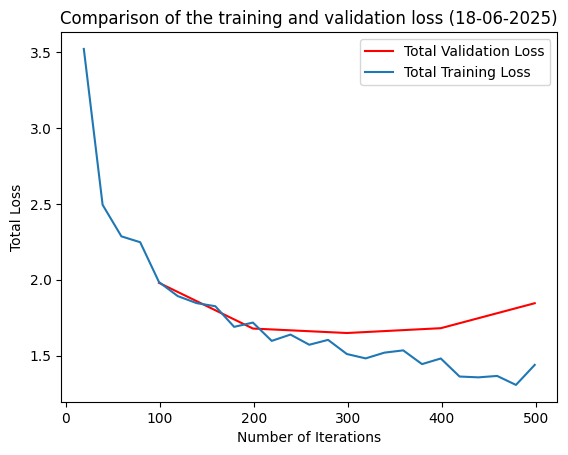

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir

experiment_metrics = load_json_arr(experiment_folder + '/metrics2.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics if 'validation_loss' in x],
   [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x], label='Total Validation Loss', color='red')
plt.plot(
   [x['iteration'] for x in experiment_metrics if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics if 'total_loss' in x], label='Total Training Loss')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss (18-06-2025)')
plt.ylabel('Total Loss')
plt.xlabel('Number of Iterations')
plt.show()

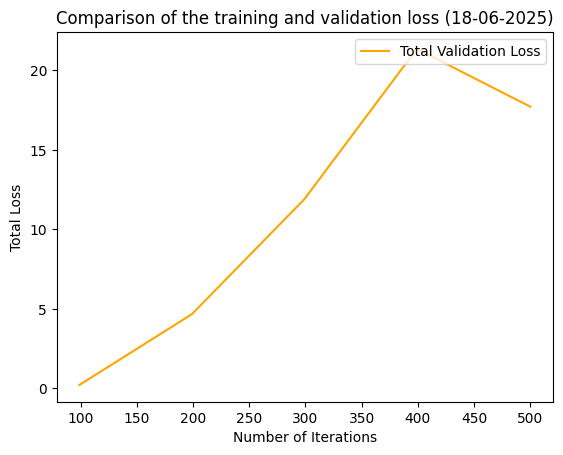

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir

experiment_metrics = load_json_arr(experiment_folder + '/new_metrics.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics if 'segm/AP50' in x], label='Total Validation Loss', color='orange')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss (18-06-2025)')
plt.ylabel('Total Loss')
plt.xlabel('Number of Iterations')
plt.show()

# Cascade MRCNN

In [ ]:
# Set the base (pre-trained) model from the detectron2 model_zoo
cmrcnn_config = "Misc/cascade_mask_rcnn_R_50_FPN_3x.yaml"

# trained_model = "/content/drive/MyDrive/Research/models/250312_flexi.pth"

trains = ("Small_train",) # Registered train data
tests = ("Small_val",) # Registered validation data

out_dir = "/content/drive/MyDrive/Research/Small_cmrcnn"

cfg = setup_cfg(cmrcnn_config, trains, tests, workers = 4, eval_period=100, max_iter=500, out_dir=out_dir, batch_size_per_im=512, resize="rand_fixed", ims_per_batch=1)

In [ ]:
# cfg.SOLVER.IMS_PER_BATCH = 1

In [ ]:
trainer = MyTrainer(cfg, patience = 5)
trainer.resume_or_load(resume=False)
trainer.train()

[06/28 06:07:24 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_480dd8.pkl: 288MB [00:01, 248MB/s]                           
roi_heads.box_predictor.0.cls_score.{bias, weight}
roi_heads.box_predictor.1.cls_score.{bias, weight}
roi_heads.box_predictor.2.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


Path to model weights to be loaded:  /root/.torch/iopath_cache/detectron2/Misc/cascade_mask_rcnn_R_50_FPN_3x/144998488/model_final_480dd8.pkl
[06/28 06:07:55 d2.utils.events]:  eta: 0:01:15  iter: 19  total_loss: 6.443  loss_cls_stage0: 0.6758  loss_box_reg_stage0: 0.7779  loss_cls_stage1: 0.6773  loss_box_reg_stage1: 1.011  loss_cls_stage2: 0.6502  loss_box_reg_stage2: 0.6987  loss_mask: 0.6932  loss_rpn_cls: 1.145  loss_rpn_loc: 0.2287    time: 1.1069  last_time: 0.1399  data_time: 1.1216  last_data_time: 0.0006   lr: 5.3944e-05  max_mem: 13062M
[06/28 06:08:20 d2.utils.events]:  eta: 0:02:03  iter: 39  total_loss: 5.298  loss_cls_stage0: 0.5812  loss_box_reg_stage0: 0.7682  loss_cls_stage1: 0.5413  loss_box_reg_stage1: 1.047  loss_cls_stage2: 0.4376  loss_box_reg_stage2: 0.721  loss_mask: 0.672  loss_rpn_cls: 0.2566  loss_rpn_loc: 0.2512    time: 1.1660  last_time: 0.1468  data_time: 1.0849  last_data_time: 0.0006   lr: 0.00011037  max_mem: 13062M
[06/28 06:08:44 d2.utils.events]:  

In [ ]:
print(out_dir)

/content/drive/MyDrive/Research/Small_cmrcnn


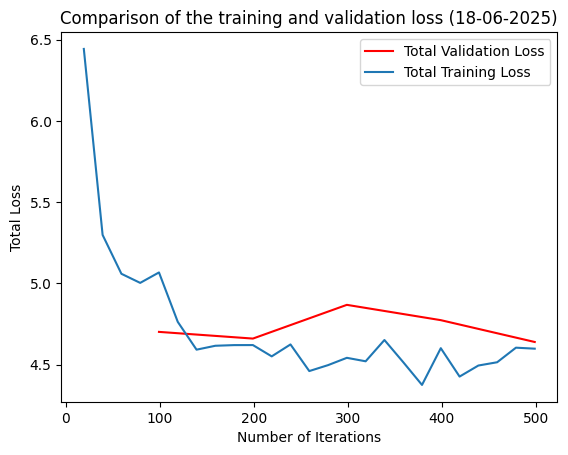

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics if 'validation_loss' in x],
   [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x], label='Total Validation Loss', color='red')
plt.plot(
   [x['iteration'] for x in experiment_metrics if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics if 'total_loss' in x], label='Total Training Loss')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss (18-06-2025)')
plt.ylabel('Total Loss')
plt.xlabel('Number of Iterations')
plt.show()

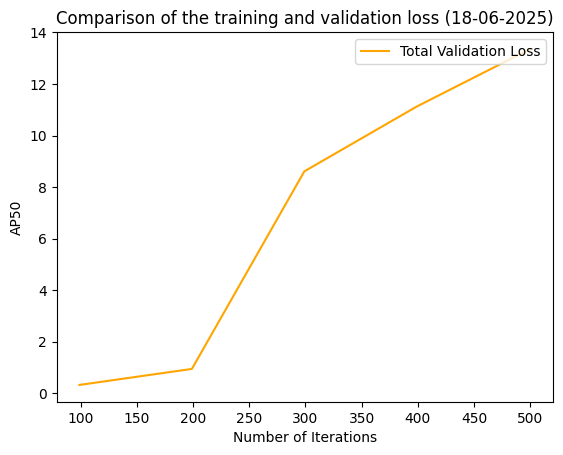

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics if 'segm/AP50' in x], label='Total Validation Loss', color='orange')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss (18-06-2025)')
plt.ylabel('AP50')
plt.xlabel('Number of Iterations')
plt.show()

# Cascade MRCNN X

In [ ]:
from detectree2.preprocessing.tiling import tile_data, to_traintest_folders
from detectree2.models.train import register_train_data, MyTrainer, setup_cfg
import rasterio
import geopandas as gpd

# Set tiling parameters
buffer = 20
tile_width = 30
tile_height = 30
threshold = 0.6
appends = str(tile_width) + "_" + str(buffer) + "_" + str(threshold)

In [ ]:
# Juaq West
site_path = "/content/drive/MyDrive/Research/data/Small_JE"
img_path = site_path + "/rgb/Small_JE.tif"
crown_path = site_path + "/crowns/Small_JE.gpkg"
out_dir = site_path + '/tiles_' + appends + "/"

# Read in the tiff file
data = rasterio.open(img_path)

# Read in crowns (then filter by an attribute?)
crowns = gpd.read_file(crown_path)
crowns = crowns.to_crs(data.crs.data)


In [ ]:
train_location = out_dir + "train/"
register_train_data(train_location, 'Small', val_fold=4)

In [ ]:
# Set the base (pre-trained) model from the detectron2 model_zoo
cmrcnnx_config = "Misc/cascade_mask_rcnn_X_152_32x8d_FPN_IN5k_gn_dconv.yaml"

# trained_model = "/content/drive/MyDrive/Research/models/250312_flexi.pth"

trains = ("Small_train",) # Registered train data
tests = ("Small_val",) # Registered validation data

out_dir = "/content/drive/MyDrive/Research/Small_rcnnX"

cfg = setup_cfg(cmrcnnx_config, trains, tests, workers = 4, eval_period=100, max_iter=500, out_dir=out_dir, batch_size_per_im=512, resize="rand_fixed", ims_per_batch=1)

In [ ]:
# cfg.SOLVER.IMS_PER_BATCH = 1

In [ ]:
trainer = MyTrainer(cfg, patience = 5)
trainer.resume_or_load(resume=False)
trainer.train()

[06/28 11:20:12 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_0039999_e76410.pkl: 732MB [00:28, 26.0MB/s]                           
roi_heads.box_predictor.0.cls_score.{bias, weight}
roi_heads.box_predictor.1.cls_score.{bias, weight}
roi_heads.box_predictor.2.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


Path to model weights to be loaded:  /root/.torch/iopath_cache/detectron2/Misc/cascade_mask_rcnn_X_152_32x8d_FPN_IN5k_gn_dconv/18131413/model_0039999_e76410.pkl


/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/28 11:21:28 d2.utils.events]:  eta: 0:05:01  iter: 19  total_loss: 6.72  loss_cls_stage0: 0.7109  loss_box_reg_stage0: 0.7511  loss_cls_stage1: 0.669  loss_box_reg_stage1: 1.03  loss_cls_stage2: 0.7589  loss_box_reg_stage2: 0.6741  loss_mask: 0.6908  loss_rpn_cls: 1.098  loss_rpn_loc: 0.3095    time: 0.9610  last_time: 0.7700  data_time: 0.5606  last_data_time: 0.0031   lr: 5.3944e-05  max_mem: 7662M
[06/28 11:21:52 d2.utils.events]:  eta: 0:04:47  iter: 39  total_loss: 5.479  loss_cls_stage0: 0.5916  loss_box_reg_stage0: 0.7286  loss_cls_stage1: 0.5614  loss_box_reg_stage1: 1.075  loss_cls_stage2: 0.5133  loss_box_reg_stage2: 0.7809  loss_mask: 0.6404  loss_rpn_cls: 0.2594  loss_rpn_loc: 0.2755    time: 0.9599  last_time: 0.4453  data_time: 0.4059  last_data_time: 0.0034   lr: 0.00011037  max_mem: 7662M
[06/28 11:22:16 d2.utils.events]:  eta: 0:04:16  iter: 59  total_loss: 5.105  loss_cls_stage0: 0.5443  loss_box_reg_stage0: 0.7135  loss_cls_stage1: 0.5223  loss_box_reg_stage1: 1.

In [ ]:
print(out_dir)

/content/drive/MyDrive/Research/Small_rcnnX


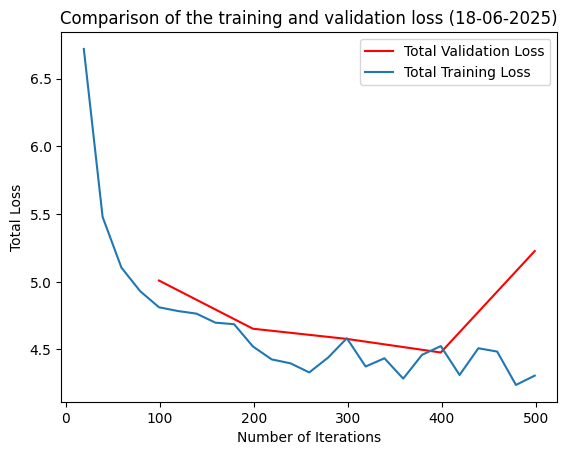

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics if 'validation_loss' in x],
   [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x], label='Total Validation Loss', color='red')
plt.plot(
   [x['iteration'] for x in experiment_metrics if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics if 'total_loss' in x], label='Total Training Loss')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss (18-06-2025)')
plt.ylabel('Total Loss')
plt.xlabel('Number of Iterations')
plt.show()

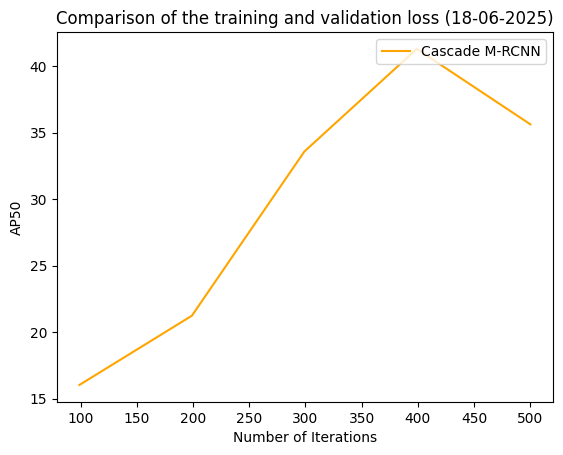

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics if 'segm/AP50' in x], label='Cascade M-RCNN', color='orange')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss (18-06-2025)')
plt.ylabel('AP50')
plt.xlabel('Number of Iterations')
plt.show()

In [ ]:
out_dir_resnext = "/content/drive/MyDrive/Research/Small_flexi"
out_dir_cmrcnn = "/content/drive/MyDrive/Research/Small_cmrcnn"

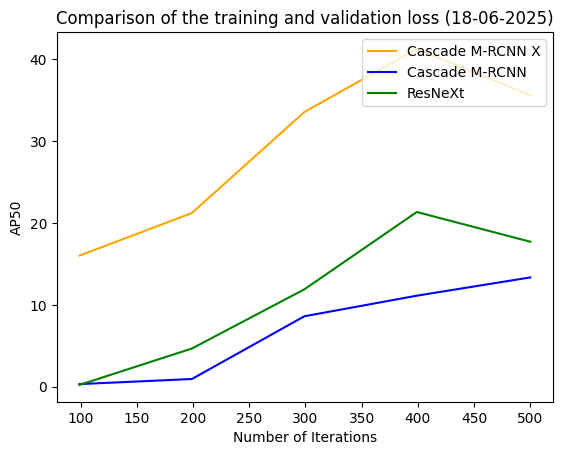

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir
experiment_folder_resnext = out_dir_resnext
experiment_folder_cmrcnn = out_dir_cmrcnn

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')
experiment_metrics_cmrcnn = load_json_arr(experiment_folder_cmrcnn + '/metrics.json')
experiment_metrics_resnext = load_json_arr(experiment_folder_resnext + '/metrics2.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics if 'segm/AP50' in x], label='Cascade M-RCNN X', color='orange')
plt.plot(
   [x['iteration'] for x in experiment_metrics_cmrcnn if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics_cmrcnn if 'segm/AP50' in x], label='Cascade M-RCNN', color='blue')
plt.plot(
   [x['iteration'] for x in experiment_metrics_resnext if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics_resnext if 'segm/AP50' in x], label='ResNeXt', color='green')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss (18-06-2025)')
plt.ylabel('AP50')
plt.xlabel('Number of Iterations')
plt.show()

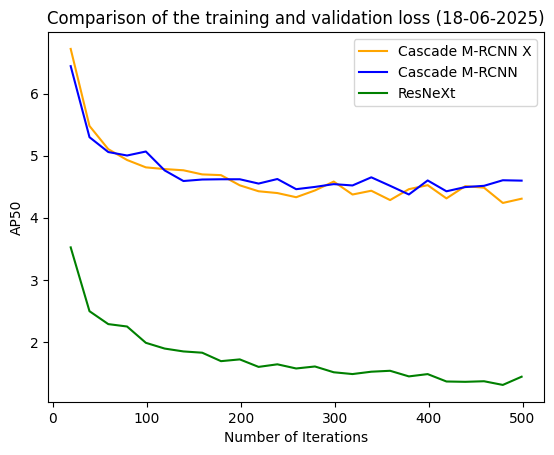

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir
experiment_folder_resnext = out_dir_resnext
experiment_folder_cmrcnn = out_dir_cmrcnn

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')
experiment_metrics_cmrcnn = load_json_arr(experiment_folder_cmrcnn + '/metrics.json')
experiment_metrics_resnext = load_json_arr(experiment_folder_resnext + '/metrics2.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics if 'total_loss' in x], label='Cascade M-RCNN X', color='orange')
plt.plot(
   [x['iteration'] for x in experiment_metrics_cmrcnn if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics_cmrcnn if 'total_loss' in x], label='Cascade M-RCNN', color='blue')
plt.plot(
   [x['iteration'] for x in experiment_metrics_resnext if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics_resnext if 'total_loss' in x], label='ResNeXt', color='green')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss (18-06-2025)')
plt.ylabel('AP50')
plt.xlabel('Number of Iterations')
plt.show()

# ResNeXt + PointRend

In [ ]:
from detectree2.preprocessing.tiling import tile_data, to_traintest_folders
from detectree2.models.train import register_train_data, MyTrainer, setup_cfg
import rasterio
import geopandas as gpd

# Set tiling parameters
buffer = 20
tile_width = 30
tile_height = 30
threshold = 0.6
appends = str(tile_width) + "_" + str(buffer) + "_" + str(threshold)

In [ ]:
# Juaq West
site_path = "/content/drive/MyDrive/Research/data/Small_JE"
img_path = site_path + "/rgb/Small_JE.tif"
crown_path = site_path + "/crowns/Small_JE.gpkg"
out_dir = site_path + '/tiles_' + appends + "/"

# Read in the tiff file
data = rasterio.open(img_path)

# Read in crowns (then filter by an attribute?)
crowns = gpd.read_file(crown_path)
crowns = crowns.to_crs(data.crs.data)


In [ ]:
train_location = out_dir + "train/"
register_train_data(train_location, 'Small2', val_fold=4)

In [ ]:
from detectron2.projects import point_rend
from detectron2.config import get_cfg

# Set the base (pre-trained) model from the detectron2 model_zoo
resnext_pr_config = "/content/detectron2/projects/PointRend/configs/InstanceSegmentation/pointrend_rcnn_X_101_32x8d_FPN_3x_coco.yaml"
backbone_weight = "detectron2://PointRend/InstanceSegmentation/pointrend_rcnn_X_101_32x8d_FPN_3x_coco/28119989/model_final_ba17b9.pkl"

# trained_model = "/content/drive/MyDrive/Research/models/250312_flexi.pth"

trains = ("Small2_train",) # Registered train data
tests = ("Small2_val",) # Registered validation data

out_dir = "/content/drive/MyDrive/Research/Small_pointrend"


cfg = setup_cfg("point_rend", resnext_pr_config, trains, tests, workers = 4, eval_period=100, max_iter=500, out_dir=out_dir, batch_size_per_im=512, resize="rand_fixed", ims_per_batch=1)

In [ ]:
# cfg.SOLVER.IMS_PER_BATCH = 1

In [ ]:
trainer = MyTrainer(cfg, patience = 5)
trainer.resume_or_load(resume=False)
trainer.train()

[06/28 15:46:51 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_ba17b9.pkl: 495MB [00:21, 23.1MB/s]                           


WARNING [06/28 15:47:36 d2.projects.point_rend.mask_head]: Weight format of PointRend models have changed! Applying automatic conversion now ...


  pixel_mean
  pixel_std


Path to model weights to be loaded:  /root/.torch/iopath_cache/detectron2/PointRend/InstanceSegmentation/pointrend_rcnn_X_101_32x8d_FPN_3x_coco/28119989/model_final_ba17b9.pkl


/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/28 15:48:03 d2.utils.events]:  eta: 0:01:50  iter: 19  total_loss: 5.553  loss_cls: 2.485  loss_box_reg: 0.7256  loss_mask: 0.4962  loss_mask_point: 0.5477  loss_rpn_cls: 1.032  loss_rpn_loc: 0.2472    time: 0.9176  last_time: 0.1390  data_time: 0.9093  last_data_time: 0.0142   lr: 5.3944e-05  max_mem: 7030M
[06/28 15:48:29 d2.utils.events]:  eta: 0:01:44  iter: 39  total_loss: 2.729  loss_cls: 0.5969  loss_box_reg: 0.7214  loss_mask: 0.4017  loss_mask_point: 0.5326  loss_rpn_cls: 0.2095  loss_rpn_loc: 0.209    time: 1.0026  last_time: 0.1093  data_time: 0.9041  last_data_time: 0.0088   lr: 0.00011037  max_mem: 7030M
[06/28 15:48:55 d2.utils.events]:  eta: 0:01:40  iter: 59  total_loss: 2.459  loss_cls: 0.496  loss_box_reg: 0.6647  loss_mask: 0.3761  loss_mask_point: 0.5253  loss_rpn_cls: 0.1695  loss_rpn_loc: 0.1901    time: 1.1110  last_time: 1.4291  data_time: 1.1421  last_data_time: 1.2478   lr: 0.0001668  max_mem: 7030M
[06/28 15:49:20 d2.utils.events]:  eta: 0:01:35  iter: 79

In [ ]:
print(out_dir)

/content/drive/MyDrive/Research/Small_pointrend


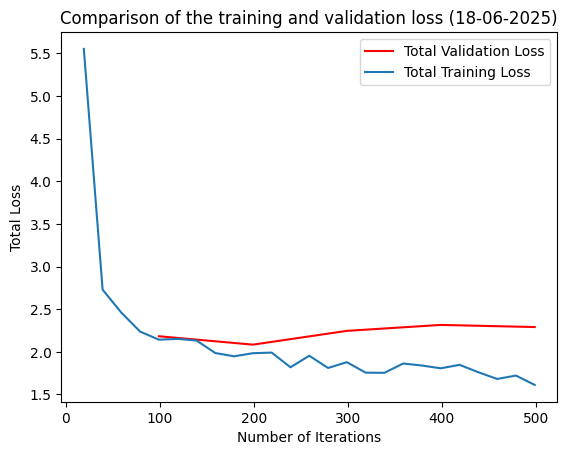

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics if 'validation_loss' in x],
   [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x], label='Total Validation Loss', color='red')
plt.plot(
   [x['iteration'] for x in experiment_metrics if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics if 'total_loss' in x], label='Total Training Loss')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss (18-06-2025)')
plt.ylabel('Total Loss')
plt.xlabel('Number of Iterations')
plt.show()

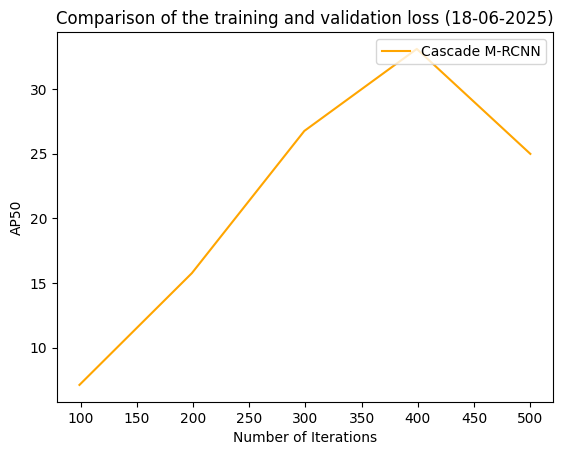

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics if 'segm/AP50' in x], label='Cascade M-RCNN', color='orange')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss (18-06-2025)')
plt.ylabel('AP50')
plt.xlabel('Number of Iterations')
plt.show()

In [ ]:
out_dir_resnext = "/content/drive/MyDrive/Research/Small_flexi"
out_dir_cmrcnn = "/content/drive/MyDrive/Research/Small_cmrcnn"

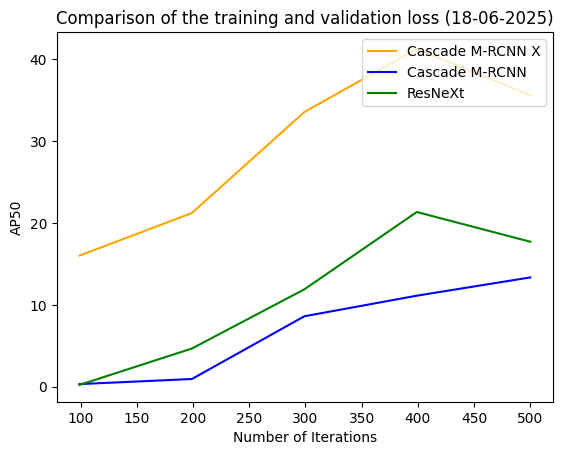

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir
experiment_folder_resnext = out_dir_resnext
experiment_folder_cmrcnn = out_dir_cmrcnn

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')
experiment_metrics_cmrcnn = load_json_arr(experiment_folder_cmrcnn + '/metrics.json')
experiment_metrics_resnext = load_json_arr(experiment_folder_resnext + '/metrics2.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics if 'segm/AP50' in x], label='Cascade M-RCNN X', color='orange')
plt.plot(
   [x['iteration'] for x in experiment_metrics_cmrcnn if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics_cmrcnn if 'segm/AP50' in x], label='Cascade M-RCNN', color='blue')
plt.plot(
   [x['iteration'] for x in experiment_metrics_resnext if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics_resnext if 'segm/AP50' in x], label='ResNeXt', color='green')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss (18-06-2025)')
plt.ylabel('AP50')
plt.xlabel('Number of Iterations')
plt.show()

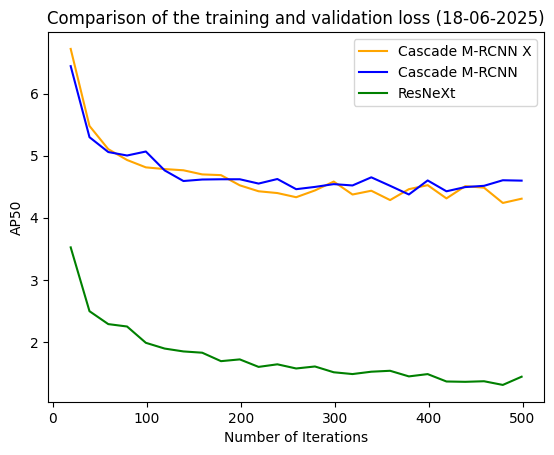

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir
experiment_folder_resnext = out_dir_resnext
experiment_folder_cmrcnn = out_dir_cmrcnn

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')
experiment_metrics_cmrcnn = load_json_arr(experiment_folder_cmrcnn + '/metrics.json')
experiment_metrics_resnext = load_json_arr(experiment_folder_resnext + '/metrics2.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics if 'total_loss' in x], label='Cascade M-RCNN X', color='orange')
plt.plot(
   [x['iteration'] for x in experiment_metrics_cmrcnn if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics_cmrcnn if 'total_loss' in x], label='Cascade M-RCNN', color='blue')
plt.plot(
   [x['iteration'] for x in experiment_metrics_resnext if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics_resnext if 'total_loss' in x], label='ResNeXt', color='green')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss (18-06-2025)')
plt.ylabel('AP50')
plt.xlabel('Number of Iterations')
plt.show()

# ResNet 101 + PointRend

In [ ]:
from detectree2.preprocessing.tiling import tile_data, to_traintest_folders
from detectree2.models.train import register_train_data, MyTrainer, setup_cfg
import rasterio
import geopandas as gpd

# Set tiling parameters
buffer = 20
tile_width = 30
tile_height = 30
threshold = 0.6
appends = str(tile_width) + "_" + str(buffer) + "_" + str(threshold)

In [ ]:
# Juaq West
site_path = "/content/drive/MyDrive/Research/data/Small_JE"
img_path = site_path + "/rgb/Small_JE.tif"
crown_path = site_path + "/crowns/Small_JE.gpkg"
out_dir = site_path + '/tiles_' + appends + "/"

# Read in the tiff file
data = rasterio.open(img_path)

# Read in crowns (then filter by an attribute?)
crowns = gpd.read_file(crown_path)
crowns = crowns.to_crs(data.crs.data)


In [ ]:
train_location = out_dir + "train/"
register_train_data(train_location, 'Small2', val_fold=4)

In [ ]:
from detectron2.projects import point_rend
from detectron2.config import get_cfg

# Set the base (pre-trained) model from the detectron2 model_zoo
resnet_pr_config = "/content/detectron2/projects/PointRend/configs/InstanceSegmentation/pointrend_rcnn_R_101_FPN_3x_coco.yaml"
backbone_weight = "https://dl.fbaipublicfiles.com/detectron2/PointRend/InstanceSegmentation/pointrend_rcnn_R_101_FPN_3x_coco/28119983/model_final_3f4d2a.pkl"

# trained_model = "/content/drive/MyDrive/Research/models/250312_flexi.pth"

trains = ("Small2_train",) # Registered train data
tests = ("Small2_val",) # Registered validation data

out_dir = "/content/drive/MyDrive/Research/Small_pointrend_resnet101"


cfg = setup_cfg("point_rend", resnet_pr_config, trains, tests, workers = 4, eval_period=100, max_iter=500, out_dir=out_dir, batch_size_per_im=512, resize="rand_fixed", ims_per_batch=1, model_weight=backbone_weight)

In [ ]:
# cfg.SOLVER.IMS_PER_BATCH = 1

In [ ]:
trainer = MyTrainer(cfg, patience = 5)
trainer.resume_or_load(resume=False)
trainer.train()

[06/29 03:35:35 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_3f4d2a.pkl: 317MB [00:07, 39.7MB/s]                           


WARNING [06/29 03:35:54 d2.projects.point_rend.mask_head]: Weight format of PointRend models have changed! Applying automatic conversion now ...


  pixel_mean
  pixel_std


Path to model weights to be loaded:  /root/.torch/iopath_cache/detectron2/PointRend/InstanceSegmentation/pointrend_rcnn_R_101_FPN_3x_coco/28119983/model_final_3f4d2a.pkl


/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/29 03:36:20 d2.utils.events]:  eta: 0:01:40  iter: 19  total_loss: 5.573  loss_cls: 2.527  loss_box_reg: 0.7165  loss_mask: 0.4583  loss_mask_point: 0.5367  loss_rpn_cls: 1.09  loss_rpn_loc: 0.2379    time: 0.9089  last_time: 0.2031  data_time: 0.9136  last_data_time: 0.0042   lr: 5.3944e-05  max_mem: 4156M
[06/29 03:36:47 d2.utils.events]:  eta: 0:01:33  iter: 39  total_loss: 2.635  loss_cls: 0.5919  loss_box_reg: 0.7105  loss_mask: 0.3822  loss_mask_point: 0.5455  loss_rpn_cls: 0.2105  loss_rpn_loc: 0.2173    time: 1.0157  last_time: 0.1299  data_time: 0.9414  last_data_time: 0.0046   lr: 0.00011037  max_mem: 4808M
[06/29 03:37:11 d2.utils.events]:  eta: 0:01:29  iter: 59  total_loss: 2.439  loss_cls: 0.5012  loss_box_reg: 0.6874  loss_mask: 0.363  loss_mask_point: 0.5292  loss_rpn_cls: 0.136  loss_rpn_loc: 0.1837    time: 1.0921  last_time: 0.2993  data_time: 1.0886  last_data_time: 0.1604   lr: 0.0001668  max_mem: 5043M
[06/29 03:37:38 d2.utils.events]:  eta: 0:01:25  iter: 79 

In [ ]:
print(out_dir)

/content/drive/MyDrive/Research/Small_pointrend_resnet101


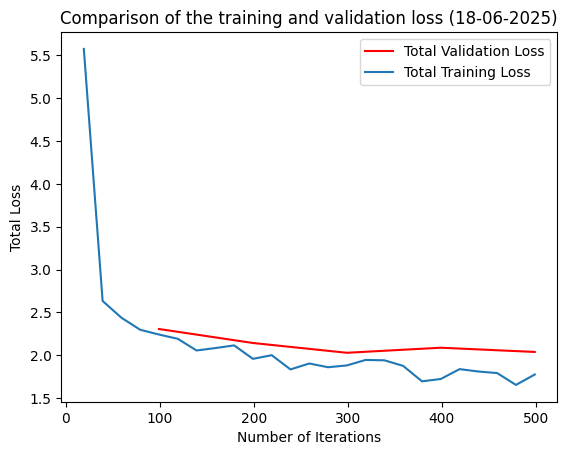

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics if 'validation_loss' in x],
   [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x], label='Total Validation Loss', color='red')
plt.plot(
   [x['iteration'] for x in experiment_metrics if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics if 'total_loss' in x], label='Total Training Loss')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss (18-06-2025)')
plt.ylabel('Total Loss')
plt.xlabel('Number of Iterations')
plt.show()

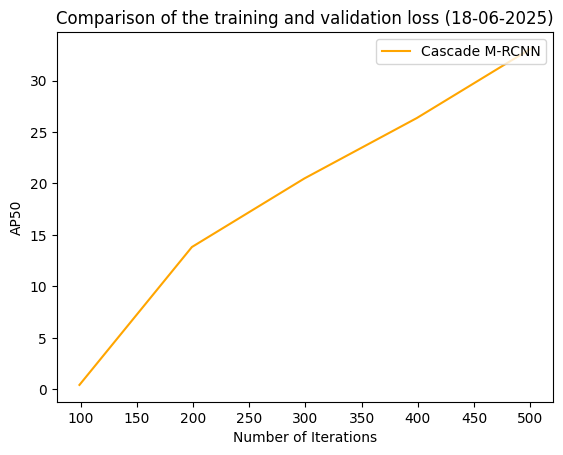

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics if 'segm/AP50' in x], label='Cascade M-RCNN', color='orange')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss (18-06-2025)')
plt.ylabel('AP50')
plt.xlabel('Number of Iterations')
plt.show()

In [ ]:
out_dir_resnext = "/content/drive/MyDrive/Research/Small_flexi"
out_dir_cmrcnn = "/content/drive/MyDrive/Research/Small_cmrcnn"

In [ ]:
out_dir_pointrend_101 = "/content/drive/MyDrive/Research/Small_pointrend_resnet101"
out_dir_pointrendX = "/content/drive/MyDrive/Research/Small_pointrend"
out_dir_cmrcnnx = "/content/drive/MyDrive/Research/Small_rcnnX"

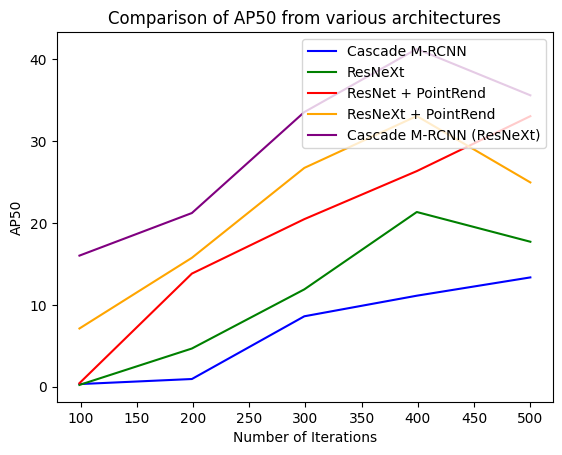

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder_resnext = out_dir_resnext
experiment_folder_cmrcnn = out_dir_cmrcnn
experiment_folder_pointrend_101 = out_dir_pointrend_101
experiment_folder_pointrendX = out_dir_pointrendX
experiment_folder_cmrcnnx = out_dir_cmrcnnx

experiment_metrics_cmrcnn = load_json_arr(experiment_folder_cmrcnn + '/metrics.json')
experiment_metrics_resnext = load_json_arr(experiment_folder_resnext + '/metrics2.json')
experiment_metrics_pointrend_101 = load_json_arr(experiment_folder_pointrend_101 + '/metrics.json')
experiment_metrics_pointrendX = load_json_arr(experiment_folder_pointrendX + '/metrics.json')
experiment_metrics_cmrcnnx = load_json_arr(experiment_folder_cmrcnnx + '/metrics.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics_cmrcnn if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics_cmrcnn if 'segm/AP50' in x], label='Cascade M-RCNN', color='blue')
plt.plot(
   [x['iteration'] for x in experiment_metrics_resnext if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics_resnext if 'segm/AP50' in x], label='ResNeXt', color='green')
plt.plot(
   [x['iteration'] for x in experiment_metrics_pointrend_101 if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics_pointrend_101 if 'segm/AP50' in x], label='ResNet + PointRend', color='red')
plt.plot(
   [x['iteration'] for x in experiment_metrics_pointrendX if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics_pointrendX if 'segm/AP50' in x], label='ResNeXt + PointRend', color='orange')
plt.plot(
   [x['iteration'] for x in experiment_metrics_cmrcnnx if 'segm/AP50' in x],
   [x['segm/AP50'] for x in experiment_metrics_cmrcnnx if 'segm/AP50' in x], label='Cascade M-RCNN (ResNeXt)', color='purple')


plt.legend(loc='upper right')
plt.title('Comparison of AP50 from various architectures')
plt.ylabel('AP50')
plt.xlabel('Number of Iterations')
plt.show()

In [ ]:
import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder_resnext = out_dir_resnext
experiment_folder_cmrcnn = out_dir_cmrcnn
experiment_folder_pointrend_101 = out_dir_pointrend_101
experiment_folder_pointrendX = out_dir_pointrendX
experiment_folder_cmrcnnx = out_dir_cmrcnnx

experiment_metrics_cmrcnn = load_json_arr(experiment_folder_cmrcnn + '/metrics.json')
experiment_metrics_resnext = load_json_arr(experiment_folder_resnext + '/metrics2.json')
experiment_metrics_pointrend_101 = load_json_arr(experiment_folder_pointrend_101 + '/metrics.json')
experiment_metrics_pointrendX = load_json_arr(experiment_folder_pointrendX + '/metrics.json')
experiment_metrics_cmrcnnx = load_json_arr(experiment_folder_cmrcnnx + '/metrics.json')

plt.plot(
   [x['iteration'] for x in experiment_metrics_cmrcnn if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics_cmrcnn if 'total_loss' in x], label='Cascade M-RCNN', color='blue')
plt.plot(
   [x['iteration'] for x in experiment_metrics_resnext if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics_resnext if 'total_loss' in x], label='ResNeXt', color='green')
plt.plot(
   [x['iteration'] for x in experiment_metrics_pointrend_101 if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics_pointrend_101 if 'total_loss' in x], label='ResNet + PointRend', color='red')
plt.plot(
   [x['iteration'] for x in experiment_metrics_pointrendX if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics_pointrendX if 'total_loss' in x], label='ResNeXt + PointRend', color='orange')
plt.plot(
   [x['iteration'] for x in experiment_metrics_cmrcnnx if 'total_loss' in x],
   [x['total_loss'] for x in experiment_metrics_cmrcnnx if 'total_loss' in x], label='Cascade M-RCNN (ResNeXt)', color='purple')


plt.legend(loc='upper right')
plt.title('Comparison of the training loss from various architectures')
plt.ylabel('Total loss')
plt.xlabel('Number of Iterations')
plt.show()